## Multivariate Time Series using RNN with Keras

https://medium.com/datadriveninvestor/multivariate-time-series-using-rnn-with-keras-7f78f4488679

In [ ]:
# multiple issues with the code 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import tensorflow as tf

In [2]:
stock_data = pd.read_csv('HistoricalQuotes.csv', skiprows=1,
                          names=['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'],
                          date_parser='Date')

stock_data=stock_data.head(1213)

In [3]:
stock_data.shape

(1213, 6)

In [4]:
stock_data.head(5)

,Date,Close/Last,Volume,Open,High,Low
0,11/27/2019,1312.99,996329,1315.00,1318.36,1309.63
1,11/26/2019,1313.55,1069795,1309.86,1314.80,1305.09
2,11/25/2019,1306.69,1036487,1299.18,1311.31,1298.13
3,11/22/2019,1295.34,1386506,1305.62,1308.73,1291.41
4,11/21/2019,1301.35,995499,1301.48,1312.59,1293.00


In [5]:
stock_data.dtypes

Date           object
Close/Last    float64
Volume          int64
Open          float64
High          float64
Low           float64
dtype: object

In [6]:
stock_data['average'] = (stock_data['High'] + stock_data['Low'])/2

In [7]:
stock_data.head(5)

,Date,Close/Last,Volume,Open,High,Low,average
0,11/27/2019,1312.99,996329,1315.00,1318.36,1309.63,1313.995
1,11/26/2019,1313.55,1069795,1309.86,1314.80,1305.09,1309.945
2,11/25/2019,1306.69,1036487,1299.18,1311.31,1298.13,1304.720
3,11/22/2019,1295.34,1386506,1305.62,1308.73,1291.41,1300.070
4,11/21/2019,1301.35,995499,1301.48,1312.59,1293.00,1302.795


In [8]:
# take volume and average as the input features
input_feature= stock_data.iloc[:,[2,6]].values

print(input_feature.shape)
input_data = input_feature

(1213, 2)


In [9]:
input_data[:5]

array([[9.963290e+05, 1.313995e+03],
       [1.069795e+06, 1.309945e+03],
       [1.036487e+06, 1.304720e+03],
       [1.386506e+06, 1.300070e+03],
       [9.954990e+05, 1.302795e+03]])

In [10]:
# plt.plot(input_feature[:,0])
# plt.title("Volume of stocks sold")
# plt.xlabel("Time (latest-> oldest)")
# plt.ylabel("Volume of stocks traded")
# plt.show();

### Visualize Time Series

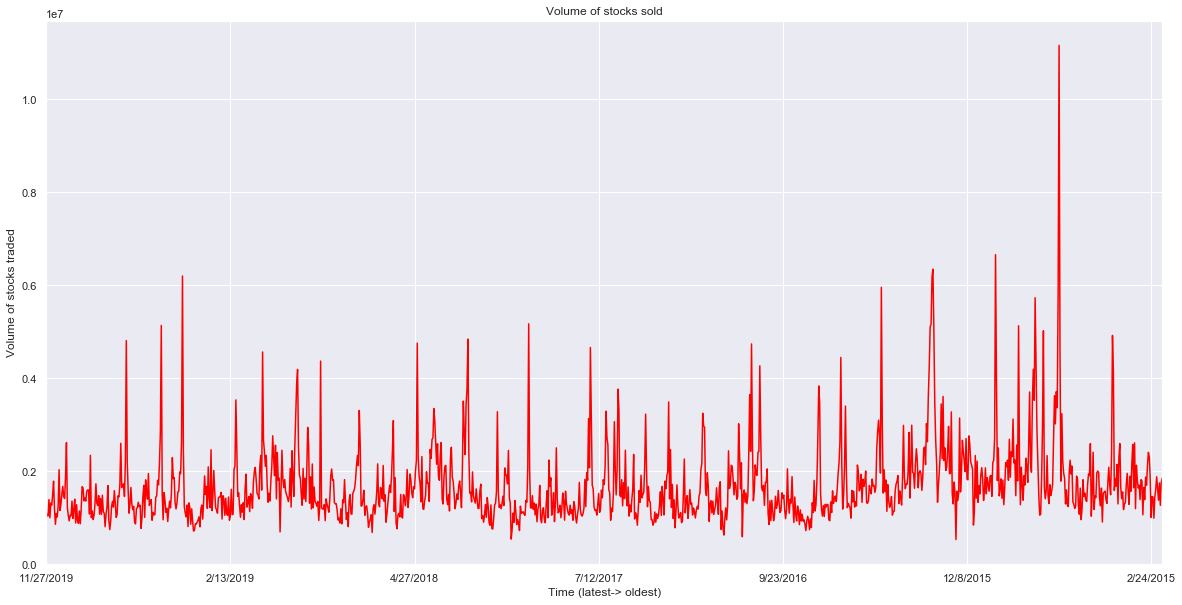

In [11]:
sns.set()
plt.figure(figsize=(20,10))
stock_data.set_index('Date')['Volume'].plot(color='red')
plt.title("Volume of stocks sold")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Volume of stocks traded");

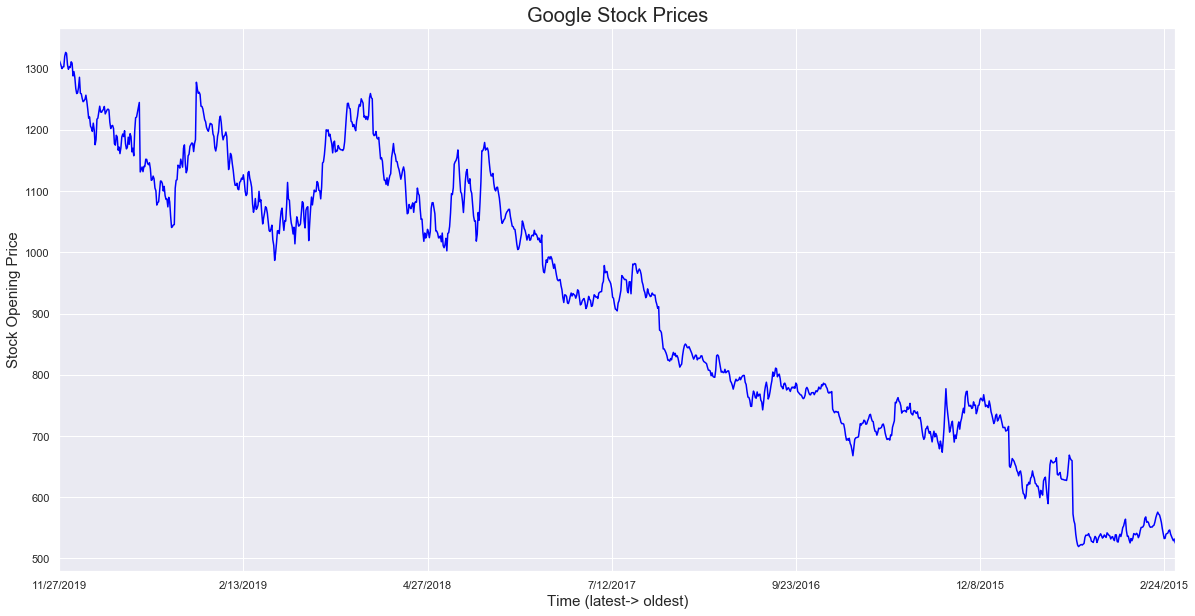

In [12]:
# plt.plot(input_feature[:,1], color='blue')
plt.figure(figsize=(20,10))
stock_data.set_index('Date')['average'].plot(color='blue')
plt.title("Google Stock Prices",fontsize=20)
plt.xlabel("Time (latest-> oldest)", fontsize=15)
plt.ylabel("Stock Opening Price",fontsize=15)
plt.show()

### Train Test Split

In [57]:
# do not do the random split

train, test = stock_data.loc[377:][['Volume','average']], stock_data.iloc[0:377][['Volume','average']]

In [58]:
print(train.shape)
print(test.shape)

(836, 2)
(377, 2)


In [59]:
test

,Volume,average
0,996329,1313.995
1,1069795,1309.945
2,1036487,1304.720
3,1386506,1300.070
4,995499,1302.795
...,...,...
372,1519860,1126.170
373,1697489,1134.370
374,1538169,1139.465
375,1881046,1131.950


In [46]:
train

,Date,Close/Last,Volume,Open,High,Low,average
377,5/31/2018,1084.99,3085325,1067.56,1097.19,1067.56,1082.375
378,5/30/2018,1067.80,1129958,1063.03,1069.21,1056.83,1063.020
379,5/29/2018,1060.32,1858676,1064.89,1073.37,1055.22,1064.295
380,5/25/2018,1075.66,878903,1079.02,1082.56,1073.78,1078.170
381,5/24/2018,1079.24,757752,1079.00,1080.47,1066.15,1073.310
...,...,...,...,...,...,...,...
1208,2/11/2015,535.97,1372342,535.30,538.45,533.38,535.915
1209,2/10/2015,536.94,1744529,529.30,537.70,526.92,532.310
1210,2/9/2015,527.83,1263243,528.00,532.00,526.02,529.010
1211,2/6/2015,531.00,1758422,527.64,537.20,526.41,531.805


### Normalize Data

In [60]:
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# input_data = scaler.fit_transform(input_data)
sc= MinMaxScaler(feature_range=(0,1))
# input_data[:,0:2] = sc.fit_transform(input_feature[:,:])
train_scaled = sc.fit_transform(train)
test_scaled = sc.transform(test)

In [64]:
train_scaled[:10]

array([[0.24073361, 0.85294274],
       [0.05672118, 0.82361765],
       [0.12529816, 0.82554942],
       [0.03309532, 0.84657167],
       [0.02169424, 0.8392082 ],
       [0.04992238, 0.83607948],
       [0.05283854, 0.84425354],
       [0.04564487, 0.8505943 ],
       [0.09121021, 0.82708726],
       [0.04742649, 0.84962463]])

In [63]:
test_scaled[:10]

array([[0.04414585, 1.20387415],
       [0.05105946, 1.19773793],
       [0.04792497, 1.18982144],
       [0.08086398, 1.18277615],
       [0.04406774, 1.18690484],
       [0.07364875, 1.18732908],
       [0.06984092, 1.21335121],
       [0.09042301, 1.22284342],
       [0.11817234, 1.21991167],
       [0.06277664, 1.19225321]])

In [65]:
print(len(train_scaled))
print(len(test_scaled))

836
377


This is a time series problem. If we need to predict the Google stock prices correctly then we need to consider the volume of the stocks traded from the previous days as well as the average stock prices from previous days.
We will be creating the data that will go back to 50 business days in past for the prediction.

Input data is in the form: [Volume of stocks traded, Average stock price] and we need to create a time series data.
The time series data for today should contain the [Volume of stocks traded, Average stock price] for past 50 days and the target variable will be Google’s stock price today and so on.
As the stock price prediction is based on multiple input features, it is a multivariate regression problem.
We loop through all the samples and for each day we go back 50 business days in the past and add the volume of the stocks traded an average stock price.

In [ ]:
lookback= 50

# test_size=int(.3 * len(stock_data))
X=[]
y=[]
for i in range(len(train_scaled))-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,1])

In [14]:
lookback= 50

test_size=int(.3 * len(stock_data))
X=[]
y=[]
for i in range(len(stock_data)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,1])

In [ ]:
input_data[:10]

# time series with two inputs
lookback= 1
test_size=int(.3 * len(stock_data))
X=[]
y=[]
for i in range(len(stock_data)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,1])
    
print(len(X), len(y), len(t))

In [15]:
print(len(X), len(y), len(t))

1162 1162 50


In [16]:
# X contains all data except the ones in the time_steps (50) 
X, y= np.array(X), np.array(y)
X_test = X[:test_size+lookback]
X = X.reshape(X.shape[0],lookback, 2)
X_test = X_test.reshape(X_test.shape[0],lookback, 2)
print(X.shape)
print(X_test.shape)

(1162, 50, 2)
(413, 50, 2)


In [28]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, LSTM

- We add 30 RNN cells that will be stacked one after the other in the RNN, implementing an efficient stacked RNN.
- return_sequencesis True to return the last output in the output sequence.
- input_shape will be of the 3D format of test sample size, time steps, no. of input features.
- Finally, the output will have only one unit as this is a regression problem

In [32]:
model = Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 30)            3960      
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [31]:
# sample size, time steps, input features
# X.shape

(1162, 50, 2)

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
model.fit(X, y, epochs=200, batch_size=32)


Epoch 1/200
1162/1162 [==============================] - 3s 2ms/step - loss: 0.0293
Epoch 2/200
1162/1162 [==============================] - 2s 2ms/step - loss: 0.0026
Epoch 3/200
1162/1162 [==============================] - 2s 2ms/step - loss: 0.0021
Epoch 4/200
1162/1162 [==============================] - 2s 2ms/step - loss: 0.0020
Epoch 5/200
1162/1162 [==============================] - 2s 2ms/step - loss: 0.0019
Epoch 6/200
1162/1162 [==============================] - 2s 2ms/step - loss: 0.0018
Epoch 7/200
1162/1162 [==============================] - 2s 2ms/step - loss: 0.0016
Epoch 8/200
1162/1162 [==============================] - 2s 2ms/step - loss: 0.0016
Epoch 9/200
1162/1162 [==============================] - 2s 2ms/step - loss: 0.0015
Epoch 10/200
1162/1162 [==============================] - 2s 2ms/step - loss: 0.0019
Epoch 11/200
1162/1162 [==============================] - 2s 2ms/step - loss: 0.0015
Epoch 12/200
1162/1162 [==============================] - 2s 2ms/step - l

1162/1162 [==============================] - 2s 2ms/step - loss: 2.9082e-04
Epoch 92/200
1162/1162 [==============================] - 2s 2ms/step - loss: 3.4950e-04
Epoch 93/200
1162/1162 [==============================] - 2s 2ms/step - loss: 3.7125e-04
Epoch 94/200
1162/1162 [==============================] - 2s 2ms/step - loss: 3.5602e-04
Epoch 95/200
1162/1162 [==============================] - 2s 2ms/step - loss: 2.9283e-04
Epoch 96/200
1162/1162 [==============================] - 2s 2ms/step - loss: 2.9165e-04
Epoch 97/200
1162/1162 [==============================] - 2s 2ms/step - loss: 3.1131e-04
Epoch 98/200
1162/1162 [==============================] - 2s 2ms/step - loss: 3.4543e-04
Epoch 99/200
1162/1162 [==============================] - 2s 2ms/step - loss: 3.5631e-04
Epoch 100/200
1162/1162 [==============================] - 2s 2ms/step - loss: 3.0248e-04
Epoch 101/200
1162/1162 [==============================] - 2s 2ms/step - loss: 3.5988e-04
Epoch 102/200
1162/1162 [=======

1162/1162 [==============================] - 2s 2ms/step - loss: 2.2662e-04
Epoch 182/200
1162/1162 [==============================] - 2s 2ms/step - loss: 2.5045e-04
Epoch 183/200
1162/1162 [==============================] - 2s 2ms/step - loss: 2.4601e-04
Epoch 184/200
1162/1162 [==============================] - 2s 2ms/step - loss: 2.5653e-04
Epoch 185/200
1162/1162 [==============================] - 2s 2ms/step - loss: 2.8273e-04
Epoch 186/200
1162/1162 [==============================] - 2s 2ms/step - loss: 2.4307e-04
Epoch 187/200
1162/1162 [==============================] - 2s 2ms/step - loss: 2.4717e-04
Epoch 188/200
1162/1162 [==============================] - 2s 2ms/step - loss: 2.3911e-04
Epoch 189/200
1162/1162 [==============================] - 2s 2ms/step - loss: 2.5429e-04
Epoch 190/200
1162/1162 [==============================] - 2s 2ms/step - loss: 2.4218e-04
Epoch 191/200
1162/1162 [==============================] - 2s 2ms/step - loss: 2.4645e-04
Epoch 192/200
1162/1162 

In [35]:
predicted_value= model.predict(X_test)

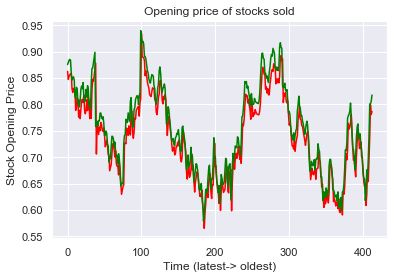

In [36]:
plt.plot(predicted_value, color= 'red')
plt.plot(input_data[lookback:test_size+(2*lookback),1], color='green')
plt.title("Opening price of stocks sold")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()